# Baroclinic Vortex D-Flow FM validation test case 

## Objectives and scope
To set up a simple (idealized) validation case to assess whether or not oceanic mesoscale variability and eddy dynamics variability are adequately represented by D-HYDRO 3D. 

Essentially, are features simulated in D-HYDRO 3D at these scales numerical artefacts or oceanographic features?

## Baroclinic Vortex
The idealised baroclinic vortex (McWilliams and Flierl, 1979) where an anticyclonic eddy propagates over a beta-plane and a flat bottom is proposed as a test case for D-HYDRO 3D.

The simulation experiment in D-HYDRO 3D will help evaluate how reasonably the model code can represent oceanic mesoscale variability and eddy dynamics. 

In the Northern Hemisphere the baroclinic vortex should propagate to the southwest at rates of approximately **XX** km/day (see below animation from: https://github.com/NEMO-ocean/NEMO-examples#vortex)

<img src="NotebookFigures/VORTEX_anim.gif" width="500" height="500"/>

## D-HYDRO set up, initial condition and simulation experiments

### Model set up
The model set up follows similar configurations (Spall and Holland, 1991; Penven et al., 2006) as closely as possible:
- Domain: 1800 x 1800 km
- Resolution: 10 km
- 𝛽-plane approximation centered around 38.5°N

### Initial condition
The vortex is initialised by a Gaussian surface pressure distribution 𝑃(𝑧=0) with
- A maximum surface geostrophic velocity of 1m/s
- A horizontal e-folding scale (𝜆) of 60km
- A continuous background stratification (for 3D experiments)

### Simulation experiments
The following simulation experiments are proposed:
1. **2D experiments:** \
    a. Uniform resolution structured grid \
    b. Variable resolution unstructured grid
2. **3D experiment:** \
    a. Uniform resolution structured grid \
    b. Variable resolution unstructured grid 
3. **Nesting experiments** \
    a. ... 


## References
- McWilliams, J.C., Flierl, G.R., 1979. On the evolution of isolated nonlinear vortices. J. Phys. Oceanogr. 9, 1155–1182.
- Penven, P., Debreu, L., Marchesiello, P., McWilliams, J.C., 2006. Application of the ROMS embedding procedure for the central California upwelling system. Ocean Model. 12, 157–187.
- Spall, M. A., and W. R. Holland, 1991: A Nested Primitive Equation Model for Oceanic Applications. J. Phys. Oceanogr., 21, 205–220.


# Import python libraries & set path to filename

In [1]:
# import libraries
from dfm_tools.get_nc import get_netdata, get_ncmodeldata, plot_netmapdata
from dfm_tools.get_nc_helpers import get_ncvardimlist, get_timesfromnc, get_hisstationlist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# set filename - note use *_map.nc to plot grid
fname = 'c:\oceaneddy\DFM_OUTPUT_oceaneddymankmx0\oceaneddymankmx0_map.nc'

# Plot model grid

analyzing netdata from domain 0000 of 0000 (counting max number of facenodes)
processing netdata from domain 0000 of 0000


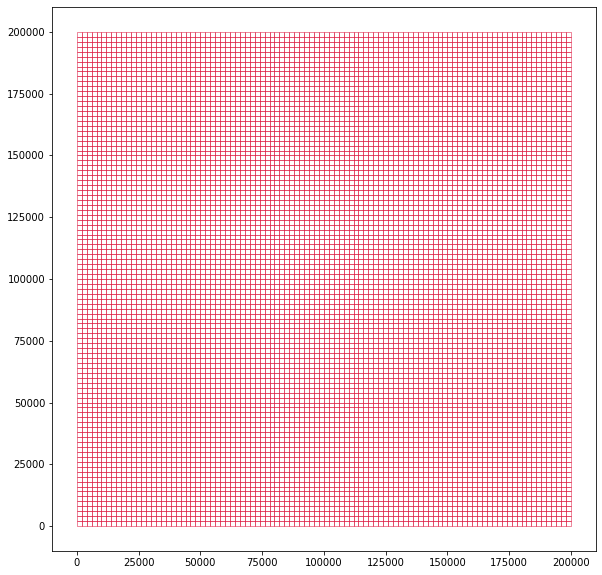

In [36]:
ds = get_netdata(file_nc=fname)
fig, ax = plt.subplots(figsize=(15, 10))
pc = plot_netmapdata(ds.verts,
                     values=None,
                     ax=None,
                     linewidth=0.5,
                     color="crimson",
                     facecolor="None")
ax.set_aspect('equal')

# Plot eddy evolution

analyzing netdata from domain 0000 of 0000 (counting max number of facenodes)
processing netdata from domain 0000 of 0000
reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
varname: mesh2d_s1  (241, 10000)  ('time', 'mesh2d_nFaces'), coordinates=(mesh2d_face_x mesh2d_face_y)
analyzing netdata from domain 0000 of 0000 (counting max number of facenodes)
processing netdata from domain 0000 of 0000
reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
varname: mesh2d_s1  (241, 10000)  ('time', 'mesh2d_nFaces'), coordinates=(mesh2d_face_x mesh2d_face_y)
analyzing netdata from domain 0000 of 0000 (counting max number of fac

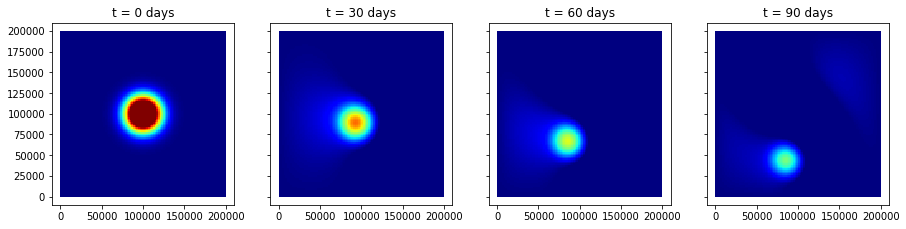

In [44]:
cnt = 0
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(15, 10))

for i in [0, 30, 60, 90]:

#for i in tsteps2plot:

    ugrid_all = get_netdata(file_nc=fname)

    #plot water level on map
    ssh = get_ncmodeldata(file_nc=fname, 
                          varname='mesh2d_s1', 
                          timestep=i)

    #    fig, axs = plt.subplots(2, int(len(tsteps2plot)/2), sharey=True)
    pc = plot_netmapdata(ugrid_all.verts, values=ssh[0,:], ax=axs[cnt], linewidth=0.5, cmap="jet")
    pc.set_clim([0, 0.025])
    #ax.set_title('%s (%s)'%(ssh.var_varname, ssh.var_ncvarobject.units))
    axs[cnt].set_title('t = '+str(i)+' days')
    axs[cnt].set_aspect('equal')

    cnt = cnt + 1

